# Calibration
Black-Scholes model only gives a very crude fit to market prices. We will test the accuracy of prices using `Implied Volatility.`

The **Black-Scholes price** of a `European call option` with strike $K$ and maturity $T$ in the market described above
is given by the formulae:
$$ V(S_t,t,K,T,r,\sigma):=S_t N(d_1) - K e^{-r(T-t)} N(d_2)$$
where
$$
d_1 := \tfrac{1}{\sigma \sqrt{T-t}} \left( \log(\tfrac{S_t}{K}) + (r + \tfrac{1}{2}\sigma^2) (T-t)\right) 
$$
$$
d_2 := \tfrac{1}{\sigma \sqrt{T-t}} \left( \log(\tfrac{S_t}{K}) + (r - \tfrac{1}{2}\sigma^2) (T-t)\right) := d_1 - \sigma \sqrt{T-t}
$$
and $N(.)$ is the cumulative distribution function of the standard normal distribution.

* Let us pretend that interest rates are constant and equal for lending and borrowing, so that we can read off $r$ from the overnight lending rate.
* Let us pretend that there is no bid-ask spread, so that we can read off $S_0$ from market prices for the stock.
* We can read off the strike, $K$,  and the maturity, $T$ from the contract of an option.

But before we can apply the Black-Scholes formula we need to know $\sigma$ which is a parameter of our *model* and not of the market. The value of the volatility $\sigma$ depends upon our *beliefs* about the future evolution of the stock price. If you don't believe the Black-Scholes model then you probably don't even think $\sigma$ is well-defined. However, whatever your beliefs about the stock price,
you can define the *implied volatility* $\sigma_{K,T}$. This is the solution of the equation
$$
V(S,K,T,r,\sigma_{K,T})=V_{K,T}
$$
where $V_{K,T}$ is the market price of a European call option with strike $K$ and maturity $T$. $\sigma_{K,T}$ is the price that the volatilty would need to be for this call option to be correctly priced in the Black-Scholes model.
This is why it is called the *implied volatility* as it is the value of the volatility one can deduce from the Black-Scholes model. If the Black-Scholes model were correct, then $\sigma_{K,T}$ would not depend upon $K$ and $T$(i.e. same implied volatility for every call option in market irrespective of $K$ and $T$). To compute the implied volatility, we wish to solve the following equation for $\sigma_{K,T}$:
    
$$V(S,K,T,r,\sigma_{K,T})-V_{K,T}=0.$$
Plots of Implied volatility give a good way to test the accuracy of a model for option prices. We have already written a function to calculate implied volatility in *"mathfinance.py"* file and we will be reusing that function here. Lets write a unit test for our computation of the implied volatility first. This is quite simple as we compute the Black-Scholes price for a known volatility and check that is what our function returns.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mathfinance as mf
plt.rcParams['figure.figsize'] = [15,7]

In [2]:
def test_compute_implied_volatility():
    S0 = 100
    K = 110
    T = 0.5
    r = 0.02
    sigma = 0.8
    V =  mf.blackscholes(r, S0, K, T, sigma, t=0, type="call")
    sigma_implied = mf.implied_vol(r, S0, K, T, V, type = 'call', tol=0.001, method = 'Newton-Raphson')
    np.testing.assert_almost_equal(sigma,sigma_implied)

test_compute_implied_volatility()

Number of iteration : 0
Number of iteration : 1


Lets get some Market Data for options and plot the price of option against the Strike price.

In [46]:
option = mf.get_call_option_data('GOOG', date = '2024-05-17')
option

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,midPrice
0,GOOG240517C00070000,2024-02-28 18:45:19+00:00,70.0,68.45,0.0,0.0,0.0,0.0,1.0,2,0.000010,True,REGULAR,USD,0.0
1,GOOG240517C00075000,2024-01-31 14:55:52+00:00,75.0,70.29,0.0,0.0,0.0,0.0,2.0,2,0.000010,True,REGULAR,USD,0.0
2,GOOG240517C00080000,2024-02-27 19:50:56+00:00,80.0,61.35,0.0,0.0,0.0,0.0,2.0,0,0.000010,True,REGULAR,USD,0.0
3,GOOG240517C00085000,2024-02-08 20:59:11+00:00,85.0,63.56,0.0,0.0,0.0,0.0,NaN,2,0.000010,True,REGULAR,USD,0.0
4,GOOG240517C00090000,2024-02-27 19:48:10+00:00,90.0,51.47,0.0,0.0,0.0,0.0,32.0,26,0.000010,True,REGULAR,USD,0.0
5,GOOG240517C00095000,2024-02-28 15:09:19+00:00,95.0,44.44,0.0,0.0,0.0,0.0,2.0,22,0.000010,True,REGULAR,USD,0.0
6,GOOG240517C00100000,2024-02-29 15:57:32+00:00,100.0,39.55,0.0,0.0,0.0,0.0,4.0,185,0.000010,True,REGULAR,USD,0.0
7,GOOG240517C00105000,2024-02-28 15:08:37+00:00,105.0,34.67,0.0,0.0,0.0,0.0,8.0,0,0.000010,True,REGULAR,USD,0.0
8,GOOG240517C00110000,2024-03-01 15:20:34+00:00,110.0,30.71,0.0,0.0,0.0,0.0,1.0,0,0.000010,True,REGULAR,USD,0.0
9,GOOG240517C00115000,2024-03-01 15:22:20+00:00,115.0,26.07,0.0,0.0,0.0,0.0,25.0,48,0.000010,True,REGULAR,USD,0.0


In [49]:
num_rows = option.shape[0]
num_options = num_rows
last_prices = np.zeros(num_options)
mid_prices = np.zeros(num_options)  
strikes = np.zeros(num_options)
for i in range(0, num_options):
    mid_prices[i] = option.iloc[i,14]
    strikes[i] = option.iloc[i,2]
    last_prices[i] = option.iloc[i,3]
    
assert strikes[0]==70.0, 'Check first row correct'
assert strikes[-1]==225.0, 'Check last row correct'

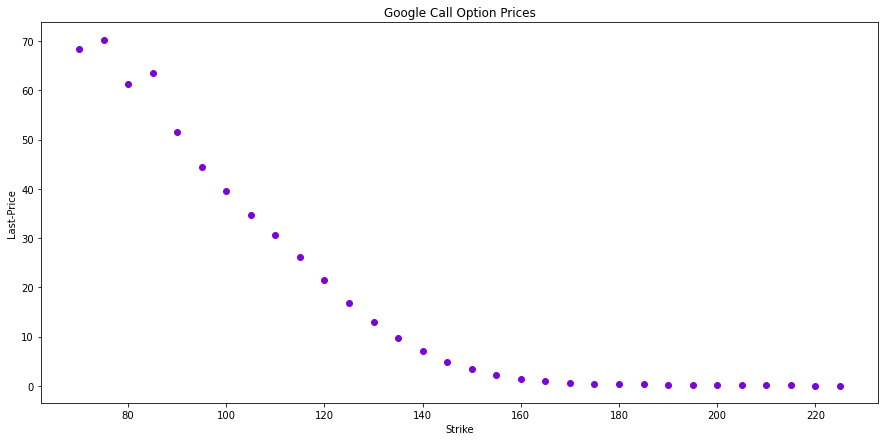

In [50]:
ax = plt.gca()
ax.scatter( strikes, last_prices, c= '#7906d6' )
ax.set_xlabel('Strike')
ax.set_ylabel('Last-Price');
ax.set_title('Google Call Option Prices');

Notice, As Strike price increases, the price of Call Option decreases.

We want to plot the Implied Volatility for real options in the Market and see if it's constant or does it vary with strike prices. This will give us the test of the accuracy of Black-Scholes formula. In order to compute the implied volatility we need market parameters $S_0$, $T$ and $r$.

In [60]:
from scipy.interpolate import CubicSpline
import scipy.optimize
import yfinance as yf
from datetime import datetime, timedelta

def days_to_maturity(maturity_date):
    future_date = datetime.strptime(maturity_date, '%Y-%m-%d')
    today = datetime.today()
    diff = (future_date - today).days + 1
    return diff

def stock_price(ticker):
    symbol = ticker
    today = datetime.today().strftime('%Y-%m-%d')
    today_datetime = datetime.strptime(today, '%Y-%m-%d')
    start_date = (today_datetime - timedelta(days=3)).strftime('%Y-%m-%d')
    data = yf.download(symbol, start=start_date, end=today)
    stock_price = data['Adj Close'].iloc[-1]
    return stock_price

def get_rf_rate(maturity_days):
    # Ticker symbols for 13-week and 5-Year U.S. Treasury bills and Notes.
    symbol_11w = '^IRX'  # 13 WEEK TREASURY BILL.
    symbol_5yrs = '^FVX' # Treasury Yield 5 Years.
    
    today = datetime.today().strftime('%Y-%m-%d')
    today_datetime = datetime.strptime(today, '%Y-%m-%d')
    start_date = (today_datetime - timedelta(days=4)).strftime('%Y-%m-%d')
    data_13w = yf.download(symbol_11w, start = start_date, end = today)
    data_5yrs = yf.download(symbol_5yrs, start = start_date, end = today)
    rf_rate_13w = data_13w['Adj Close'].iloc[-1] / 100
    rf_rate_5yrs = data_5yrs['Adj Close'].iloc[-1] / 100
    
    maturities = [91, 1825]
    rates = [rf_rate_13w, rf_rate_5yrs]

    # Perform cubic spline interpolation.
    cs = CubicSpline(maturities, rates)
    riskfree_rate = cs(maturity_days)

    return riskfree_rate

# Parameters.
T = days_to_maturity('2024-05-17')/365
S0 = stock_price('GOOGL')
r = get_rf_rate(days_to_maturity('2024-05-17'))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


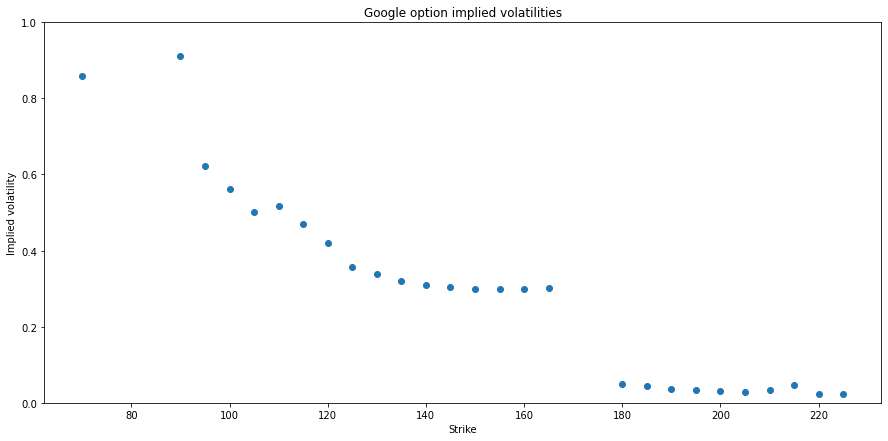

In [75]:
implied_vols = np.zeros( strikes.shape )
for i in range(0,len(strikes)):
    K = strikes[i]
    V_KT = last_prices[i]
    implied_vols[i] = mf.implied_vol(r, S0, K, T, V_KT, type = 'call', tol=0.01, method = 'secant')
ax = plt.gca()
ax.scatter( strikes, implied_vols )
ax.set_ylim(0,1);
ax.set_xlabel('Strike')
ax.set_ylabel('Implied volatility');
ax.set_title('Google option implied volatilities'); 

Here, the implied volatility is varying wildly and suggest Black-Scholes is not a good approximation. However, the true reason might be different as I have checked with Newton Raphson and secant and both fail to converge.
In certain `In-the-Money` options, when option price is less than the `Intrinsic Value`, the root finding methods fails to converge. In these cases,the `Vega` becomes zero in the Newton-Raphson method. The slope `Vega` also becomes zero when the option has a short time to expiry while being far `Out-the-Money`. Another non-convergence issue happens when we have low volatility and the root is close to discontinuity.
I will try with a different dataset.

Text(0.5, 1.0, 'Google Call Option Prices')

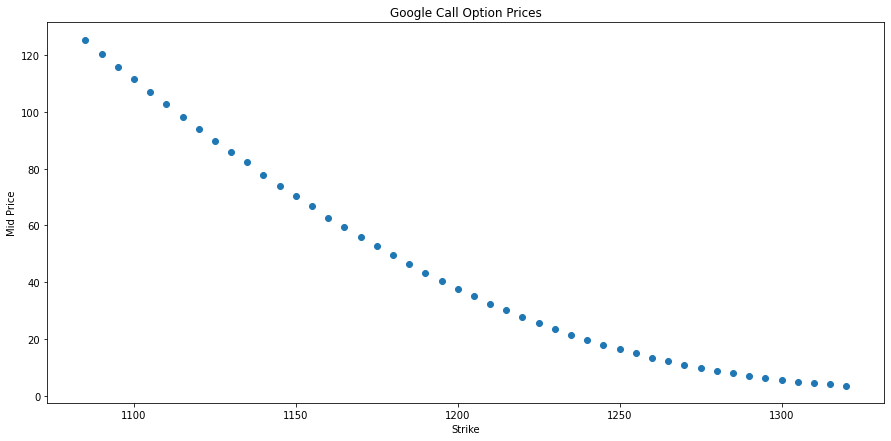

In [77]:
import pandas as pd 

excel_data = pd.read_excel('Statistics for Finance/data/options.xlsx', header=None)
start_row = 4
num_rows = excel_data.shape[0]
num_options = num_rows-start_row
mid_prices = np.zeros(num_options)
strikes = np.zeros(num_options)
for i in range(0, num_options):
    mid_prices[i] = excel_data[2][start_row+i]
    strikes[i] = excel_data[3][start_row+i]
    
assert strikes[0]==1085, 'Check first row correct'
assert strikes[-1]==1320, 'Check last row correct'

ax = plt.gca()
ax.scatter( strikes, mid_prices )
ax.set_xlabel('Strike')
ax.set_ylabel('Mid Price')
ax.set_title('Google Call Option Prices')

The file options.xlsx also contains a note of the other market parameters needed to compute the implied volatility

* $S_0=1205.415$
* $r=0.0016$
* $T=31/365$

We can use this to create a plot of the implied volatility against the strike.

Number of iteration : 0
Number of iteration : 1
Number of iteration : 2
Number of iteration : 0
Number of iteration : 1
Number of iteration : 2
Number of iteration : 0
Number of iteration : 1
Number of iteration : 2
Number of iteration : 0
Number of iteration : 1
Number of iteration : 2
Number of iteration : 0
Number of iteration : 1
Number of iteration : 2
Number of iteration : 0
Number of iteration : 1
Number of iteration : 2
Number of iteration : 0
Number of iteration : 1
Number of iteration : 2
Number of iteration : 0
Number of iteration : 1
Number of iteration : 2
Number of iteration : 0
Number of iteration : 1
Number of iteration : 2
Number of iteration : 0
Number of iteration : 1
Number of iteration : 2
Number of iteration : 0
Number of iteration : 1
Number of iteration : 2
Number of iteration : 0
Number of iteration : 1
Number of iteration : 2
Number of iteration : 0
Number of iteration : 1
Number of iteration : 2
Number of iteration : 0
Number of iteration : 1
Number of iterat

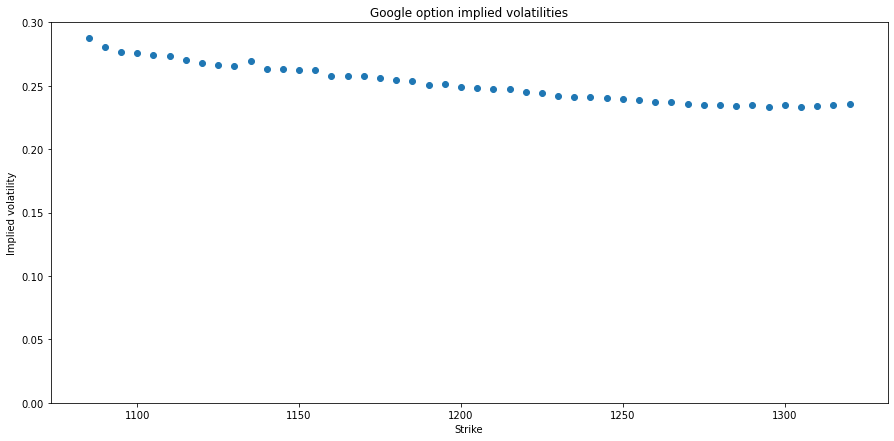

In [81]:
S0 = 1205.415
r = 0.0016
T = 31/365

implied_vols = np.zeros( strikes.shape )
for i in range(0,len(strikes)):
    K = strikes[i]
    V_KT = mid_prices[i]
    implied_vols[i] = mf.implied_vol(r, S0, K, T, V_KT, type = 'call', tol=0.01, method = 'Newton-Raphson');
ax = plt.gca();
ax.scatter( strikes, implied_vols );
ax.set_ylim(0,0.3);
ax.set_xlabel('Strike');
ax.set_ylabel('Implied volatility');
ax.set_title('Google option implied volatilities');

As we can see with this dataset, the implied volatility is not constant but also not varying that much. This suggests that Black-Scholes gives a crude first approximation to actual market option prices.

## Remark
The call options we have considered on Google stock are in fact American options not European options. Typically options on an individual stock will be American options whereas options on an index are European options. The options above do not pay dividends. American call options and European call options are equivalent for options which do not pay dividends if the interest rate $r\geq 0$. 

To see this it suffices to prove that at time $t$, a European call option with strike $K$ and maturity $T$ is always worth more than $\max\{S_t - K, 0\}$, as this implies that there is no benefit to exercising an American option before maturity.

To prove our claim we use a replication argument:
* If you have $S_t-K$ cash at time $t$: Purchase one unit of stock and put $-K$ in the risk-free account. At time $T$ this will be worth $S_T-e^{r(T-t)}K$. So having $S_t-K$ cash at time $t$ allows you to replicate $S_T-e^{r(T-t)}K$. Hence the price of a derivative with payoff
$S_T-e^{r(T-t)}K$ must be $S_t-K$.
* But $\max\{S_T-K,0\} \geq S_T - K \geq S_T - e^{r(T-t)}K$ since $r \geq 0$. So a European call option with strike $K$ and maturity $T$ is always worth more than a derivative with payoff $S_T - e^{r(T-t)}K$, and so it is always worth more than $S_t-K$.
* Since the payoff of a European call option is always non-negative, European call options must be worth at least $0$.
* Hence at time $t$, a European call option with strike $K$ and maturity $T$ is always worth more than $\max\{S_t-K,0\}$ as claimed.

This means that you can price American call options in the Black-Scholes model using the Black-Scholes formula. However, American put options are trickier to price in the Black-Scholes model.

# Modelling Approach of Classical Derivatives Trader.
The fundamental business model of a derivatives trader is to provide derivatives for their customers without taking any risks. Their profit comes from charging a small premium on each trade. It is helpful to picture them as selling *over-the-counter* derivatives to their customers and hedging them by using the stock and also *exchange-traded derivatives*. `Exchange-traded derivatives` are derivatives that are traded on an exchange. You can see publicly quoted bid and ask prices for them online. These are usually put and call options. For options on stock indices they are usually European options, for options on individual stocks they are usually American options. `Over-the-counter derivatives` are derivatives where you have to contact a trader directly to find at what price they will buy or sell the derivative. In more complex market models than the Black-Scholes model, you cannot hedge all the risks of a derivative with just the stock. You need to use other exchange-traded options to hedge the risk. For example, suppose you believe that the volatility is itself stochastic, then you can hedge against changes to the volatility and to the stock price using the stock and an exchange traded option. By choosing the right quantities you can ensure your portfolio won't change value when the stock changes price or when the volatility changes. If this is your business model, you will want to price derivatives using a market model which matches the market prices for exchange traded derivatives. If you choose a market model which does not match market prices, then you will, in effect, be offering to buy and sell financial products at a different price from market prices. This is *speculation* and is potentially risky. There is nothing wrong with pursuing a risky strategy, its just not the business model of the classic derivatives trader. They want to make money purely by offering a service, so their model must match market prices for exchange traded products.

In Classical Derivatives Traders Business model:
- The Drift$\mu$ is `Irrelevant`.
- The Historical Data is `Irrelevant`.

In this business model, the theory of Black and Scholes suggests that there is no need to model the drift. The prices quoted in the Black-Scholes model don't depend on the drift and nor does the trading strategy. Estimating the drift is hard, and if you are a derivatives trader it is wasted effort. For this reason, when choosing a model the classic derivatives trader does not even try to choose a $\mathbb{P}$-measure model, they just try to find the right $\mathbb{Q}$-measure model that will match market prices. This means the Black-Scholes model starting with the model
$$
d S_t=S_t(\mu dt + \sigma d W_t)
$$
for constants $\mu$ and $\sigma$ is rather misleading. It is better to think of $\mu$ as being an unknown function which, fortunately, is completely irrelevant to option pricing.
Black-Scholes model leads you to imagine a trader who looks at the history of stock prices and chooses the values of $\sigma$ and $\mu$ which best fit that history. But this is completely misleading. Traders in the market often have a good idea of how volatility is likely to change. For example, volatility is likely to increase in the run up to an election or a major market announcement. If you blindly use historical data, you will miss this. More alert traders will take advantage of your naivety and make a profit from you. The classic derivatives trader assumes that the *market knows best* and that future changes in the volatility are already reflected in option prices. Rather than try to out-guess the market, they take advantage of market prices and use this to *calibrate* their models. Note: Their business model is to make a risk-free profit by replicating derivatives and charging for the service.

## Risk Neutral Modelling

The classical strategy of a derivatives trader could be called *risk-neutral modelling* (this is not a standard phrase). They try to come up with a model, ${\mathbb Q}$ for asset prices such that all exchange-traded assets have a price given by
the *risk-neutral pricing formula*:
$$
\text{price at time }t=E^{\mathbb Q}_t(e^{-r(T-t) }\text{payoff}).
$$
The model they use will typically have several parameters which they use to *calibrate* to market data. This means choosing the parameters so the model matches market prices for exchange-traded derivatives. They then quote prices for over-the-counter derivatives using the risk-neutral pricing formula. They hedge their liabilities using the underlying assets and exchange-traded derivatives. 

**Remark:** I've simplified the risk-neutral pricing formula by assuming a constant interest rate. It can be generalised to 
$$
\text{price at time }t=E^{\mathbb Q}_t(e^{\int_{t}^T r_t \, dt }\text{payoff})
$$
where $r_t$ is the "short rate" at time $t$. This is the interest rate for investing/borrowing for a very small length of time, say overnight. To be precise, it is defined to be the limit of the interest rate for investing/borrowing as the time period of the investment/loan tends to zero. 

# A Jump-Diffusion Model
`Jump-Diffusion` is the simplest model which goes beyond the Black-Scholes model. We will do ${\mathbb Q}$-measure modelling and calibration.

`Recall:` - In $\mathbb Q$-measure modelling, We want to give a model for the underlying variables on which future outcome rest such that market prices are given by the formula
$$
\text{price at time (Market price)}t=E^{\mathbb Q}_t( e^{-r(T-t)} \text{payoff}).
$$
In finance the underlying variables are asset prices such as the stock price. When the underlying variables are asset prices we will have *consistency conditions* of the form:
$$
S_t = E^{\mathbb Q}_t( e^{-r(T-t)} S_T ) \qquad (Conditional Expectation)
$$
The consistency condition may be expressed as saying that *the discounted price process must be a martingale*. So not just any model can be used as a ${\mathbb Q}$-model. [Note: $X_t$ is Martingale if $\mathbb{E}_t(X_{t+\delta t}) = X_t$]

- **Example (Black-Scholes Model) :** Suppose that we want to use a ${\mathbb Q}$-model of the form
$$
S_t=S_t(\mu \, dt + \sigma \, d W_t) \qquad (GBM)
$$
for some $\mu$ and $\sigma$. It follows that 
$$
E^{\mathbb Q}(S_T) = e^{\mu T} S_0.
$$

Since the model is essentially the same at all times $t$, it satisfies the consistency condition if and only if $\mu=r$. This is the only way to use Geometric Brownian Motion(GBM) as $\mathbb Q$-measure model. There is no such restriction if you want to use it as a $\mathbb P$-measure model.

## A jump-diffusion model

We will suppose that the stock has `jumps` that follow a `Poisson process` with intensity $\lambda$. Let $N(t)$ be the number of jumps that
have occurred up to time $t$. We will suppose that the stock price at time $t$ is given by

$$\boxed{S_t:=j^{N(t)} \tilde{S}_t}$$

where $\tilde{S}_t$ follows an geometric Brownian motion
$$
d \tilde{S}_t= \tilde{S}_t( \tilde{\mu} \, dt + \sigma \, dW_t) \qquad \text{where, }(\tilde{S}=\text{Stock price without jumps}.)
$$

This means that between jumps $S_t$ follows the same SDE (but with a different initial condition). We assume the ratio $j = \frac{S_t}{S_{t-}}$ remains fixed i.e. jump size is always same. This model has 2 sources of Risks:
- Brownian Motion.
- Jumps.

<img src="pics/jumpdiffusion.png" width="530" height="500"/>

All the jumps are of a fixed proportion of the stock price: each jump takes the stock from $S_{t-}$ to $S_t = j S_{t-}$. Stock price crashes/jumps at randomly distributed intervals. Intervals between Stock price crashes are exponentially distributed or equivalently the number of jumps that have occurred follows a Poisson Process.

There will be a consistency condition on $\tilde{\mu}$ that we need to find. When $j=1$ we already know this consistency condition as our model becomes the Black-Scholes model: it is that $\tilde{\mu}=r$.

### Computing Option Prices in Jump-Diffusion Model

The ${\mathbb Q}$-probability that $N(T)=n$ is given by the Poisson distribution with parameter $\lambda T$.
$$
{\mathbb Q}(N=n)=\frac{(\lambda T)^n}{n!} \exp(-\lambda T)\qquad (\mathbb{Q}\text{-measure probability that }n\text{ jumps have occurred})
$$

The stock price at time $T$ is $S_T = j^{N(T)} \tilde{S}_T$. So the **payoff** of a call
option with strike $K$ is: 
$$
\boxed{
\max\{j^{N(T)} \tilde{S_T} -K, 0 \}}
$$

Hence
$$
\begin{split}
\text{price}&=E^{\mathbb Q}(e^{-rT} \text{payoff}) \\ 
&=
\sum_{n=0}^\infty {\mathbb Q}(N=n) E^{\mathbb Q}(e^{-rT} \max\{ j^n \tilde{S}_T - K, 0 \}) \qquad (Conditional \mathbb{E}\text{ condition on NO. of jumps = n i.e.}\mathbb{Q}(N=n))\\
&=
\sum_{n=0}^\infty \frac{(\lambda T)^n}{n!} \exp(-\lambda T) E^{\mathbb Q}(e^{-rT} \max\{ j^n \tilde{S}_T - K, 0 \})
\end{split}
$$

we need to compute the Expectation.

$$ E^{\mathbb Q}(e^{-rT} \max\{ j^n \tilde{S}_T - K, 0 \}) $$ 

The brute force approach is to notice that $\tilde{S}_T$ follows geometric Brownian motion, so we can compute
its density and hence figure out the expectation.

The "lazy" approach is to notice that this is basically the same expectation as we get when computing
the price in the Black-Scholes model, except that $\tilde{S}_T$ has drift $\tilde{\mu}$ rather than $r$
in this ${\mathbb Q}$-model.

### Observation

We know that for any $k \geq 0$,
$$E^{\mathbb Q}(e^{-\tilde{\mu}T} \max\{ \tilde{S}_T - k, 0 \})=V(\tilde{S_0}, k, T, \tilde{\mu}, \sigma)$$
where
$$V(S_0,K,T,r,\sigma)$$
is the **price of a call option with the given strike in the Black-Scholes model**.

So we can compute
$$
\begin{split}
E^{\mathbb Q}(e^{-rT} \max\{ j^n \tilde{S}_T - K, 0 \})&=
j^n e^{-rT + \tilde{\mu}T} E^{\mathbb Q}( e^{-\tilde{\mu}T} \max\{ \tilde{S}_T - j^{-n} K, 0 \}) \qquad (\text{Factoring out & Rewriting in terms of Black-Scholes}) \\
&=
j^n e^{-rT + \tilde{\mu}T} V(S_0, j^{-n} K, T, \tilde{\mu}, \sigma)
\end{split}
$$

Hence our jump diffusion model will give the price of a call option with strike $K$ and maturity $T$ as:
$$
\boxed{
\begin{split}
\text{price}&=
\sum_{n=0}^\infty \frac{(j \lambda T)^n}{n!} e^{-(r+\lambda)T + \tilde{\mu}T} V(S_0, j^{-n} K, T, \tilde{\mu}, \sigma)
\end{split}}
$$

### Consistency condition

But our formula needs to be consistent with market prices, in particular it needs to be consistent with the fact that the current stock price is $S_0$.

A call option with a strike of $0$ is the same thing as purchasing the stock, so setting $K=0$ we get the condition
$$
\begin{split}
S_0 &= \overbrace{\sum_{n=0}^\infty \frac{(j \lambda T)^n}{n!}}^{e^{j\lambda T}} e^{-(r+\lambda)T + \tilde{\mu}T} \underbrace{V(S_0, 0, T, \tilde{\mu}, \sigma)}_{S_0 \text{ Price of Stock}} \\
&=  \sum_{n=0}^\infty \frac{(\lambda T)^n}{n!} j^n \underbrace{e^{-(r+\lambda)T + \tilde{\mu}T} S_0}_{\text{Don't depend on n}} \\
&=  e^{j \lambda T}e^{-(r+\lambda)T + \tilde{\mu}T} S_0 \\
&=  e^{(\tilde{\mu}-r-\lambda(1-j))T} S_0 \\
\end{split}
$$
Note for the first part we use the power series for $e^x$.
$$e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!}$$
Hence, the **consistency condition** is:
$$\boxed{S_0 = e^{(\tilde{\mu}-r-\lambda(1-j))T} S_0}$$

So for this to be a valid model we must take
$$
\boxed{\tilde{\mu}=r+\lambda(1-j)}
$$

### Summary

**Theorem:**
    
The jump diffusion model with jump size $j$ and intensity $\lambda$ gives a valid ${\mathbb Q}$-measure model if 
$$\tilde{\mu}=r+\lambda(1-j)$$
in which case the price of a European call option with strike $K$ and maturity $T$ simplifies to
$$
\sum_{n=0}^\infty \frac{(j \lambda T)^n}{n!} e^{-j \lambda T} V(S_0, j^{-n} K, T, \tilde{\mu}, \sigma)
$$

**Check:** Reassuringly when $j=1$ this simplifies to
$$
\overbrace{\sum_{n=0}^\infty \frac{(\lambda T)^n}{n!}}^{e^{\lambda T}} e^{-\lambda T} V(S_0, K, T, r, \sigma)=V(S_0, K, T, r, \sigma)
$$
so we recover the Black-Scholes price.

Lets write a function to price a call option in the jump diffusion model. Since, as humans we cant calculate to $\infty$, we should include sufficient terms in the power series to ensure that your answer is accurate to roughly one part in a million.

In [91]:
def jump_diffusion_call_price( S, K, T, r, sigma, lbda, j):
    S = np.array(S)
    term = np.ones(S.shape)
    total = np.zeros(S.shape)
    n = 0
    mu_tilde = r + lbda*(1-j)
    while np.any(abs(term)>1e-7*abs(total)):
        V = mf.blackscholes(mu_tilde, S, j**(-n)*K, T, sigma, t=0, type="call")   # r=mu, S=S, K=j**(-n)*K, T=T, sigma=sigma, t=0.
        term = ((j*lbda*T)**n)/np.math.factorial(n) * np.exp( -j*lbda*T) * V
        total = total + term
        n = n+1
    return total

Lets choose the model parameters for the test.
$$
r = 0.02 \\
S_0 = 150  \\
\sigma = 0.2 \\
T = 1 \\
\lambda = 1 \\
j = 0.9  \\
$$
The stock is the same thing as a call price when a strike equals 0, so for very low strikes $K<<0$ the price should be nearly $S_0$.

In [101]:
# Model parameters for the test.
r = 0.02
S0 = 150
sigma = 0.2
T = 1
lbda = 1
j = 0.9

actual = jump_diffusion_call_price( S0, 0.000001, T, r, sigma, lbda, j )
np.testing.assert_almost_equal(S0,actual,decimal=2)
print("Jump-Diffusion Price : ",actual," and Stock price is : ",S0)

Jump-Diffusion Price :  149.99999850173913  and Stock price is :  150


As we have done previously, when jump size $j=1$, we should get the Black-Scholes price. When $j=1$, it implies that the size of the jump is equivalent to the current stock price ($S_0$).

In [102]:
# When jump size is 1, we should get back the Black-Scholes price.
actual = jump_diffusion_call_price( S0, S0, T, r, sigma, lbda, 1 )  # S=S0, K=S0, T=T, r=r, sigma=sigma, lbda=lbda, j=1.
expected = mf.blackscholes(r, S0, S0, T, sigma, t=0, type="call")  # S=S0 and K=S0.
print("Jump-Diffusion Price : ",actual," Black-Scholes Price : ",expected)
np.testing.assert_almost_equal(actual,expected,decimal=2)

Jump-Diffusion Price :  13.374055906736803  Black-Scholes Price :  13.374055917858811


Note: When the jump size (j) is equal to 1, it implies that every jump in the underlying asset price results in a change of exactly one unit. This essentially cancels out the effect of the strike price. Setting $K = S_0$ in the jump-diffusion model with $j = 1$ simplifies the analysis by eliminating the effect of the strike price due to the counteracting effect of the jump size. This allows for a direct comparison with the Black-Scholes formula, which assumes a continuous price process and doesn't account for jumps.

## Simulating Jump-Diffusion Model
To simulate the jump diffusion model on a grid of size $\delta t$, let $Z_t=\log(S_t)$. We may simulate $Z_t$ as
$$
Z_{t+\delta t}=Z_t + (\tilde{\mu}-\tfrac{1}{2}\sigma^2)\, \delta t + \sigma (\delta t)^{\frac{1}{2}} \epsilon_t + n_{t,t+\delta t} \log(j)
$$
where the $\epsilon_t$ are independent standard normal random variables and the $n_{t,t+\delta t}$ are independent Poisson random variables with intensity parameter $\lambda \, \delta t$. The variables $n_{t,t+\delta t}$ represent the number of jumps between time $t$ and time $t+\delta t$.

In [103]:
def simulate_jump_diffusion( S0, T, mu_twiddle, sigma, lbda, j, n_steps, n_paths ):
    t = np.linspace(0,T,n_steps+1)
    dt = T/n_steps
    Z = np.zeros((n_paths,n_steps+1))
    Z[:,0]=np.log(S0)
    for i in range(0, n_steps):
        epsilon = np.random.normal(size=(n_paths))
        jumps = np.random.poisson(lbda*dt, n_paths )
        Z[:,i+1]=Z[:,i] + (mu_twiddle-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*epsilon + np.log(j)*jumps
    S = np.exp(Z)
    return S, t

The Discounted Expected stock price in the $\mathbb{Q}$-model at time $T$ should equal $S_0$ by the consistency condition. We check if the answer is within a 99.9% confidence interval.

In [104]:
np.random.seed(0)
n_steps = 365
n_paths = 100000
mu_twiddle = r + lbda*(1-j)
S,t = simulate_jump_diffusion(S0,T,mu_twiddle,sigma, lbda, j, n_steps, n_paths)

discounted_expectation = np.exp(-r*T)*np.mean(S[:,-1])
sd = np.exp(-r*T)*np.std(S[:,-1])/np.sqrt(n_paths)
alpha = scipy.stats.norm.ppf(0.0005)
assert discounted_expectation>S0+alpha*sd
assert discounted_expectation<S0-alpha*sd

This simulation method is exact, so only one step is needed. Hence, *n_steps = 1*.

In [105]:
S,t = simulate_jump_diffusion(S0,T,mu_twiddle,sigma, lbda, j, 1, n_paths)
discounted_expectation = np.exp(-r*T)*np.mean(S[:,-1])
assert discounted_expectation>S0+alpha*sd
assert discounted_expectation<S0-alpha*sd

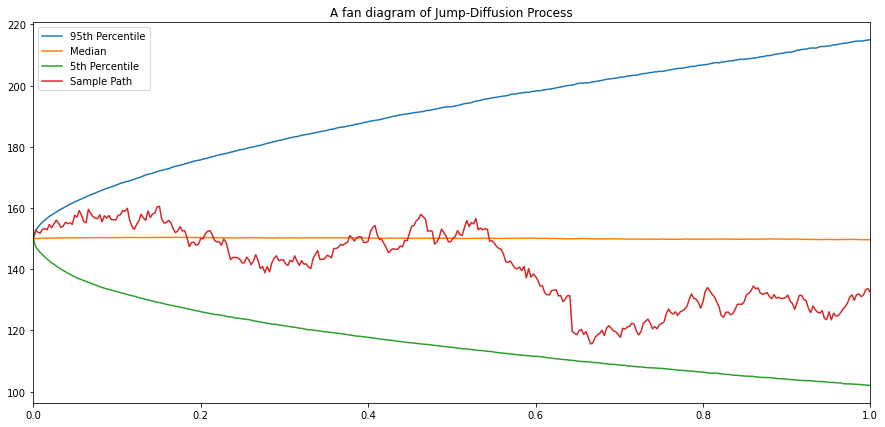

In [107]:
np.random.seed(0)
n_steps = 365
n_paths = 100000
mu_twiddle = r + lbda*(1-j)
S,times = simulate_jump_diffusion(S0,T,mu_twiddle,sigma, lbda, j, n_steps, n_paths)

top_five_percent = np.percentile(S,95,0)
bottom_five_percent = np.percentile(S,5,0)
median = np.percentile(S,50,0)
plt.plot(times, top_five_percent, label='95th Percentile')
plt.plot(times,median, label='Median')
plt.plot(times, bottom_five_percent, label='5th Percentile')
plt.plot(times,S[0,:], label='Sample Path');
plt.xlim(0,1);
plt.title('A fan diagram of Jump-Diffusion Process')
plt.legend();

## Monte Carlo Pricing
We write a general Monte Carlo pricing routine for the jump diffusion model which works with arbitrary payoff functions. The code returns a 99% confidence interval for the price.

In [108]:
def price_by_monte_carlo_jd( S0, r, sigma, lbda, j, T, n_steps,n_paths, payoff_function):
    mu_twiddle = r + lbda*(1-j)
    S,t = simulate_jump_diffusion( S0, T, mu_twiddle, sigma, lbda, j, n_steps, n_paths )
    payoffs = payoff_function(S)
    p = 99
    alpha = scipy.stats.norm.ppf((1-p/100)/2)
    price = np.exp(-r*T)*np.mean( payoffs )
    sigma_sample = np.exp(-r*T) * np.std( payoffs )
    lower = price + alpha*sigma_sample/np.sqrt(n_paths)
    upper = price - alpha*sigma_sample/np.sqrt(n_paths)
    return lower, upper

In [109]:
def price_call_by_monte_carlo_jd( S0, K, T, r, sigma, lbda, j, n_steps,n_paths ):
    # Define the payoff function, it takes an array. 
    def call_payoff( S ):
        S_T = S[:,-1]
        return np.maximum( S_T-K, 0 )
    return price_by_monte_carlo_jd(S0, r, sigma, lbda, j, T, n_steps, n_paths, call_payoff )

def test_price_call_by_monte_carlo_jd():
    np.random.seed(0)
    # Only one step is needed to price a call option.
    n_steps = 1
    K = S0
    low,high = price_call_by_monte_carlo_jd(S0, K, T, r,sigma,lbda,j, n_steps, n_paths)
    expected = jump_diffusion_call_price(S0,K,T,r,sigma, lbda, j)
    assert low<expected
    assert expected<high

test_price_call_by_monte_carlo_jd()

We now use a Monte Carlo method with 100000 steps to estimate the price of an Asian call option with strike $140$ and maturity $1$ in a jump diffusion model with parameters $S_0$, $r$, $\sigma$, $\lambda$ and $j$ as defined in the cells above. When computing the payoff of the Asian option, you should compute the average price at the end of each day.

In [114]:
K = 140
T = 1

def asian_call_payoff( S, K ):
    S_bar = np.mean(S,axis=1)
    return np.maximum( S_bar-K, 0 )

def price_asian_call_by_monte_carlo_jd( S0, r, sigma, lbda, j, K, T, n_steps, n_paths ):
    def payoff_fn(S):
        return asian_call_payoff(S,K)
    return price_by_monte_carlo_jd(S0, r, sigma, lbda,j, T, n_steps, n_paths, payoff_fn )

n_paths = 100000
low,high = price_asian_call_by_monte_carlo_jd(S0,r,sigma,lbda, j, K, T, T*365, n_paths)
asian_price = 0.5*(low+high)
print('{}__to__{}'.format(low,high)) 
assert asian_price>0
assert asian_price>14.1
assert asian_price<14.7

14.248472632844848__to__14.501400438961234


# Calibration

## Calibrating Jump-Diffusion Model to Market Prices
We will now illustrate the idea of calibration by calibrating our jump diffusion model to the Google option price data we saw before.

We begin by reading in the strikes and mid_prices from the file exactly as before.

In [115]:
excel_data = pd.read_excel('Statistics for Finance/data/options.xlsx', header=None)
start_row = 4
num_rows = excel_data.shape[0]
num_options = num_rows-start_row
mid_prices = np.zeros(num_options)
strikes = np.zeros(num_options)
for i in range(0, num_options):
    mid_prices[i] = excel_data[2][start_row+i]
    strikes[i] = excel_data[3][start_row+i]
    
assert strikes[0]==1085, 'Check first row correct'
assert strikes[-1]==1320, 'Check last row correct'

Exactly as before, we compute the `Implied volatities`. The end result is that we will have arrays `strikes` and `implied_vols` containing the strike and implied volatility for each option. This is the `Implied Volatilities under Black-Scholes Model`.

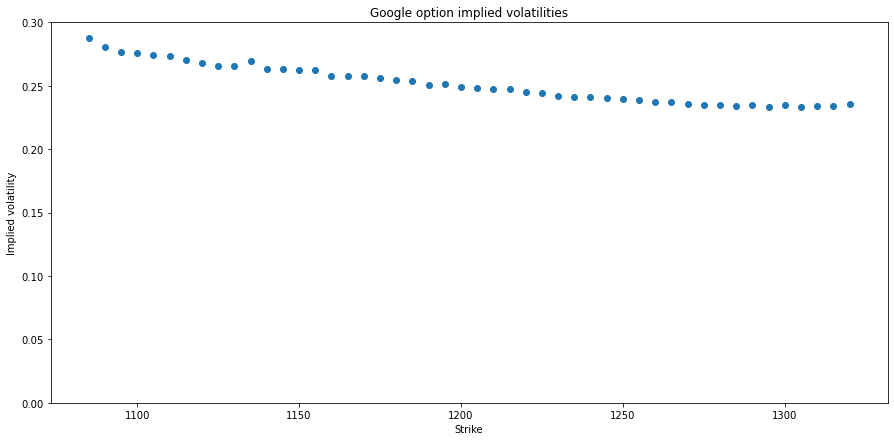

In [118]:
S0 = 1205.415
r = 0.0016
T = 31/365

implied_vols = np.zeros( strikes.shape )
for i in range(0,len(strikes)):
    K = strikes[i]
    V_KT = mid_prices[i]
    implied_vols[i] = mf.implied_vol(r, S0, K, T, V_KT, type = 'call', tol=0.01, method = 'secant');

# Plot of Strikes vs Implied Volatility
ax = plt.gca()
ax.scatter( strikes, implied_vols )
ax.set_ylim(0,0.3);
ax.set_xlabel('Strike')
ax.set_ylabel('Implied volatility');
ax.set_title('Google option implied volatilities');

### Computing the implied volatility for Jump-Diffusion model
Suppose we use the jump diffusion model with parameters $\sigma$, $\lambda$ and $j$ to compute the prices of the options. We can then compute the associated implied volatilities. The function `compute_jump_diffusion_ivols` does this calculation for all the strikes in our data. This is the `Implied Volatilities under Jump-Diffusion Model`.

In [120]:
# Computes Implied Volatilities under Jump-Diffusion Model.
def compute_jump_diffusion_ivols( S0, r, sigma, lbda, j, strikes, T ):  # strikes = vector.
    implied_vols = np.zeros( len( strikes ))
    for i in range(0, len(strikes)):
        K = strikes[i]
        price = jump_diffusion_call_price(S0, K, T, r, sigma, lbda, j)
        implied_vols[i] = mf.implied_vol(r, S0, K, T, price, type = 'call', tol=0.01, method = 'secant')
    return implied_vols

### Comparing the model and the market.
By plotting the market implied volatilities against the implied volatilities of our model, we can see how good a fit we get. We need to choose some parameter values for our model, so I simply guessed $\sigma=0.25$, $\lambda=1$, $j=0.9$. The last two parameters indicate that you can sudden $10\%$ price drops (j=0.9) happen once per year $\lambda=1$.

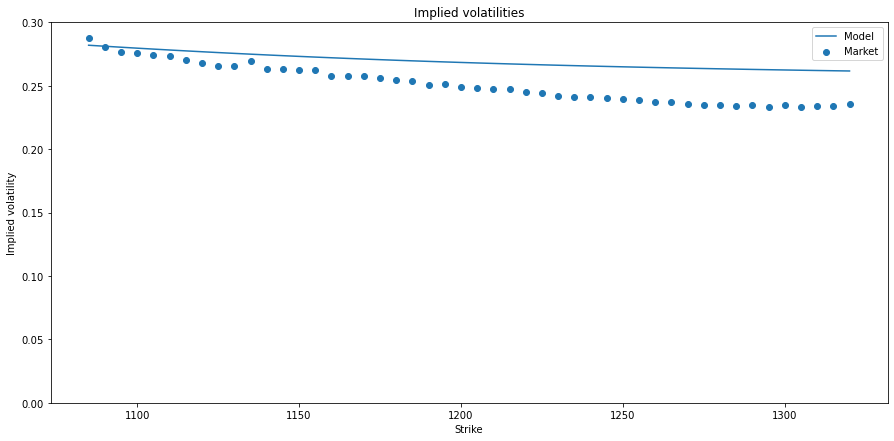

In [121]:
def plot_model_fit( sigma, lbda, j ):
    model_ivols = compute_jump_diffusion_ivols(S0, r, sigma, lbda, j, strikes, T)
    ax = plt.gca()
    ax.scatter( strikes, implied_vols, label='Market' );
    ax.plot( strikes, model_ivols, label='Model' );
    ax.set_xlabel('Strike')
    ax.set_ylabel('Implied volatility')
    ax.set_ylim(0,0.3);
    ax.set_xlabel('Strike')
    ax.set_ylabel('Implied volatility');
    ax.set_title('Implied volatilities');
    ax.legend()
    
plot_model_fit( 0.25, 1, 0.90 )   # sigma = 0.25,lambda= 1, j = 0.9.

### Calibrating the model
Rather than guess the parameters, we can try to find the "best fit". To do this we need to define what we mean by "best fit" and then use an optimization routine. I've defined the total error of our model to be the sum of squares of the differences between the implied volatilities given by our model and the implied volatilities of the market.

In [122]:
def error( sigma, lbda, j ):
    model_ivols = compute_jump_diffusion_ivols( S0, r, sigma, lbda, j, strikes, T)
    error = np.sum((model_ivols-implied_vols)**2)
    return error

### Minimizing the error

Our objective is to choose parameter values $\sigma>0$, $\lambda>0$ and $j>0$ to minimize the error. Rather than specify constraints,
I have defined a vector $x=(\log(\sigma), \log(\lambda), \log(j))$ which can take any values in ${\mathbb R}^3$.

Previously when we have performed optimizations we have been solving convex optimization problems where it is known that a local minimum
will be a global minimum. This problem is not convex, so the optimizer may not give us a truly optimal value, we just have to hope it finds a good fit. There is a degree of art/luck involved when solving non-convex problems in this way!

I found the optimizer printed out some warning messages, but still reported a success in the end, so I haven't worried too much about the warnings.

In [126]:
def objective( x ):
    sigma = np.exp(x[0])
    lbda = np.exp(x[1])
    j = np.exp(x[2])
    return error( sigma, lbda, j)

params_guess = np.log(np.array([0.25, 1, 0.90]))
res = scipy.optimize.minimize(objective,
                              params_guess,
                              method='SLSQP')

assert res.success

C:\Users\Pallu\anaconda3\lib\site-packages\scipy\optimize\zeros.py:341: RuntimeWarning: Tolerance of 0.017733604434071966 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Pallu\anaconda3\lib\site-packages\scipy\optimize\zeros.py:341: RuntimeWarning: Tolerance of -374720818.2912832 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Pallu\anaconda3\lib\site-packages\scipy\optimize\zeros.py:341: RuntimeWarning: Tolerance of -359078.8476812335 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Pallu\anaconda3\lib\site-packages\scipy\optimize\zeros.py:341: RuntimeWarning: Tolerance of 5246.58043236185 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Pallu\anaconda3\lib\site-packages\scipy\optimize\zeros.py:341: RuntimeWarning: Tolerance of 9347729456.269718 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Pallu\anaconda3\lib\site-packages\scipy\optimize\zeros.py:341: RuntimeWarning: Tolerance of -49438304210.76515 reached.
  warnings.warn(msg, RuntimeWarning)


### Plotting the results

The real test is a plot to see if we have a good fit. Indeed we do.

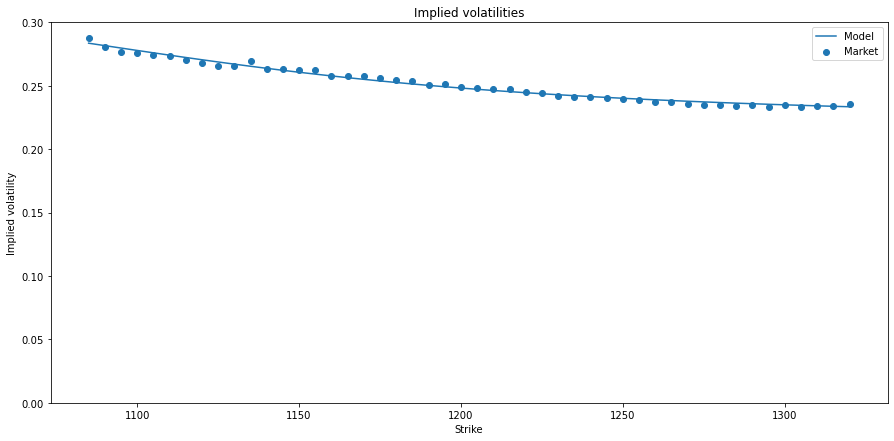

In [127]:
sigma = np.exp(res.x[0])
lbda = np.exp(res.x[1])
j = np.exp(res.x[2]) 
plot_model_fit( sigma, lbda, j)

### Summary

We got a surprisingly good fit, but this is at least in part due to us only considering one maturity date for the options. In reality one needs to find a model that fits market option prices across the range of strikes and maturities. By assuming that market prices follow a jump-diffusion ${\mathbb Q}$-measure model we have managed to find a good fit to market prices for one maturity.

Notice the following important points:
* This is not a statistical calibration to historical data.
* This is calibration of prices to current market data.
* We have not attempted to discover a ${\mathbb P}$-measure model as we don't need it to compute prices.
* Our calibration routine was fast because it can compute prices of European options quickly using the analytic formula. If you can't price European options quickly in your model it will be hard to calibrate.
    
The jump-diffusion model was an easy example. It is a challenging task to find plausible models that fit market prices well across the range of strikes and maturities *and* which are quick and easy to calibrate.

# Replication in the Jump Diffusion model

We start with a jump-diffusion ${\mathbb Q}$-model for the market with parameters $S_0, \sigma, r, \lambda, j$.  In particular
we assume the risk-free bank account has an interest rate of $r$.

## P measure model

We assume that the stock price $S_t$ follows a model equivalent to the jump-diffusion model.

To be concrete we assume specifically that
$S_t=j^N(t) \tilde{S_t}$
where $N(t)$ is the number of jumps of a Poisson process with intensity $\lambda^\prime\neq 0$ (which may be different from $\lambda$) and where
$\tilde{S_t}$ follows the process

$$
d \tilde{S}_t = \tilde{S}_t( \mu dt + \sigma d W_t)
$$
$\lambda^\prime$ and $\mu$ is different than $\mathbb{Q}$-measure model.
It is possible to think of more complex models equivalent to the jump-diffusion model, for example $\lambda^\prime$ and $\mu$ could be time varying.

Notice that the jump sizes must be certain to be $j$, otherwise the model would not be equivalent. Notice also that while $\mu$ is arbitrary, $\sigma$ is determined by the jump-diffusion model.

## Additional assumption

It is not possible to replicate derivatives in the jump diffusion model using the stock alone. We need to use another asset.

Let us choose a strike $K^\prime$. We will call the option with strike $K^\prime$ the *hedging option*.

We will assume that at all times the price of a call option with maturity $T$
and strike $K^\prime$ is given by the analytical formula for the jump diffusion model

$$
\begin{split}
W(S_t,K^\prime,T-t,r,\sigma,\lambda,j)&:=E^{\mathbb Q}(e^{-r(T-t)}\text{payoff}) \\
&=\sum_{n=0}^N \frac{(j \lambda T)^n}{n!} e^{-j \lambda (T-t)} V(S_t, j^{-n} K, T-t, \tilde{\mu}, \sigma)
\end{split}
$$

where $V$ is in turn given by the Black-Scholes formula. For brevity we will write $W(S_t,K^\prime)$ when the other parameters are unimportant. Note that I've used the fact that the Black-Scholes formula only depends on $T$ and $t$ via $T-t$ to reduce the number of parameters in $V$ slightly.

We will show that we can replicate a call option with a different strike $K$ by trading in the stock and the hedging option.

### Between jumps

Suppose that we sell a call option with strike $K$ at time $0$. We invest the rest of our wealth in the risk-free bank account,
the stock and the hedging option.

At time $0$, the ${\mathbb Q}$-expectation of our entire portfolio (which we consider to contain $-1$ units of the call option)
will therefore be zero.

Suppose that at the start of the time interval $[t,t+\delta t)$ the  ${\mathbb Q}$-expectation of our portfolio is still zero.
Suppose we hold
$\alpha_t$ units of stock and $\beta_t$ units of the hedging option throughout the time period.

By Black and Scholes theory of replication, so long as the total delta of our portfolio is $0$ throughtout this period,
the ${\mathbb Q}$-expectation of our portfolio will remain at zero. We will therefore require that
$$
\alpha_t \underbrace{\frac{\partial S}{\partial S}}_{\text{delta of stock}} + \beta_t \overbrace{\frac{\partial W}{\partial S}}^{\text{delta of hedging option}}(S_t, K^\prime) - \underbrace{\frac{\partial W}{\partial S}}_{\text{delta of option we have sold}}(S_t, K) = 0. 
$$

### At jumps

When a jump occurs we will also want our portfolio's ${\mathbb Q}$-expectation to remain fixed.
This condition may be written as

$$\alpha_t \underbrace{(S_t - j S_t)}_{\text{Change in stock price to jump}} + \beta_t \overbrace{( W(S_t,K^\prime) - W(j S_t, K^\prime ))}^{\text{Change in hedging option price between jumps}} - \underbrace{(W(S_t,K) - W(j S_t,K))}_{\text{Change in }\mathbb{Q-E}\text{ of the option we're trying to replicate}} = 0$$

### Replication strategy

We deduce that if we choose $\alpha_t$ and $\beta_t$ to satisfy the equations
$$
\begin{aligned}
\alpha_t \frac{\partial S}{\partial S} + \beta_t \frac{\partial W}{\partial S}(S_t, K^\prime) - \frac{\partial W}{\partial S}(S_t, K) &= 0. \\
\text{and}\\
\alpha_t (S_t - j S_t) + \beta_t( W(S_t,K^\prime) - W(j S_t, K^\prime )) - (W(S_t,K) - W(j S_t,K)) &= 0 
\end{aligned}
\qquad \Biggr\}\longrightarrow (\bigstar)
$$
then the ${\mathbb Q}$-expectation of our portfolio will remain $0$ at all times.

At time $T$, the ${\mathbb Q}$-expectations become the payoffs of the various assets at time $T$, and so 
this says that the total payoff of our strategy is $0$. In other words, this is a replicating strategy. 

### Numerical test

Lets test this theory in practice. We will

* Step 1 : Write a function to compute $\frac{\partial W}{\partial S}$(delta).
* Step 2 : Write a function to compute $\alpha_t$ and $\beta_t$ at each time $t$ by solving ($\bigstar$).
* Step 3 : Simulate the stock price in the ${\mathbb P}$-measure model on a discrete time grid of size $\delta t$.
* Step 4 : Simulate the discrete-strategy of charging $W(S_0, K)$, holding ${\alpha}_t$ units of stock and $\beta_t$ units of the hedging option at each time $t$, putting the remaining assets into a risk free account.
* Step 5 : Draw a scatter plot of the final stock price $S_T$ against the final portfolio value.

The numerical test tries out the replication strategy in the jump diffusion model. 

`Step 1`: Lets write a function to compute the delta of an option in the jump diffusion model, i.e.

$$ \frac{\partial W}{\partial S}(S_t, K)$$
Our code should be able to work with a vector of stock prices as one of the parameters. 

In [129]:
def jump_diffusion_delta( S, K, time_to_maturity, r, sigma, lbda, j):
    S = np.array(S)
    term = np.ones(S.shape)
    total = np.zeros(S.shape)
    n = 0
    mu_tilde = r + lbda*(1-j)
    while np.any(abs(term)>1e-7*abs(total)):
        V = mf.black_scholes_call_delta(S,0, j**(-n)*K,time_to_maturity,mu_tilde, sigma) #  (S=S,t=0,K=j**(-n)*K,T=time_to_maturity,r=mu_tilde,sigma)
        term = ((j*lbda*time_to_maturity)**n)/np.math.factorial(n) * np.exp( -j*lbda*time_to_maturity) * V
        total = total + term
        n = n+1
    return total

In [131]:
def test_jump_diffusion_delta():
    S0 = np.array([100,110])
    h = S0*10**(-5)
    K = 110
    T = 0.5
    r = 0.02
    sigma = 0.2          
    lbda = 1
    j = 0.9
    central_estimate = (jump_diffusion_call_price(S0+h,K,T,r,sigma,lbda,j) - jump_diffusion_call_price(S0-h,K,T,r,sigma,lbda,j))/(2*h)
    actual = jump_diffusion_delta( S0, K, T, r, sigma, lbda, j)
    np.testing.assert_almost_equal( central_estimate, actual, decimal=4 )

test_jump_diffusion_delta()

`Step 2 :`

We will want to solve a large number of linear $2 \times 2$ simultaneous equations, one for each scenario and time point.
So that we can do this quickly, we write a function `solve_two_by_two` that takes vectors $(a)_i$, $(b)_i$, $(c)_i$, $(d)_i$,
$(v_1)_i$, $(v_2)_i$ all of the same length and for each value of $i$ solves the simultaneous equations

$$ a x + b y = v_1$$
$$ c x + d y = v_2$$

and returns the values $x$ and $y$.

In [132]:
def solve_two_by_two( a,b,c,d, v1, v2):
    det = a*d-b*c
    alpha = (d*v1 - b*v2)/det
    beta = (-c*v1 + a*v2)/det
    return alpha,beta

In [133]:
def test_solve_two_by_two():
    a = np.array([1,2])
    b = np.array([2,-1])
    c = np.array([3,1])
    d = np.array([3,2])
    v1 = np.array([4,5])
    v2 = np.array([3,2])
    x,y = solve_two_by_two(a,b,c,d,v1,v2)
    np.testing.assert_almost_equal( a*x + b*y, v1 )
    np.testing.assert_almost_equal( c*x + d*y, v2 )

test_solve_two_by_two()

Lets write a function that computes the values of $\alpha$ and $\beta$ given the time to maturity. It should be able to perform the calculation for an entire vector of stock prices at once without any looping code. We take advantage of your `solve_two_by_two` function to do this.

In [134]:
def compute_alpha_and_beta(S, r, sigma, lbda, j, K_prime, K, time_to_maturity ):
    a = 1 
    b = jump_diffusion_delta(S,K_prime, time_to_maturity, r,sigma, lbda, j)
    v1 = jump_diffusion_delta(S,K, time_to_maturity, r,sigma, lbda, j)
    c = S - j*S
    d = jump_diffusion_call_price( S, K_prime, time_to_maturity, r, sigma, lbda, j )- \
            jump_diffusion_call_price( j*S, K_prime, time_to_maturity, r, sigma, lbda, j )
    v2 = jump_diffusion_call_price( S, K, time_to_maturity, r, sigma, lbda, j )- \
            jump_diffusion_call_price( j*S, K, time_to_maturity, r, sigma, lbda, j )
    alpha,beta = solve_two_by_two(a,b,c,d,v1,v2)
    return alpha, beta

In [135]:
example_alpha, example_beta = compute_alpha_and_beta(100,0.05,0.2,0.1,0.5, 105, 110, 1)
print(example_alpha)
print(example_beta)

-0.024109963531351333
0.8988432726689347


`Step 3 and 4 :`
Lets perform a simulation of the replication strategy for the jump diffusion model. We should perform `n_paths` simulations. For efficiency, we do not run through each scenario in turn, instead use vectors. The final output returns `two vectors` one containing the `final stock price in each scenario`, one containing the `final wealth of the replication strategy`. 
For some scenarios there will be numerical difficulties caused by the determinant of the linear equations we are solving becoming close to zero. This means that for a few scenarios in our simulation, our results will contain an error value.
In practice one could simply decide to abandon the hedging strategy when these numerical errors occurred and put all our wealth in the risk-free account. For the sake of simplicity, I was happy just to ignore the occasional numerical error in the results.

In [138]:
def simulate_replication( S0, r, sigma, lbda, j, K_prime, K, T, lambda_prime, mu, n_steps, n_paths):
    S, t = simulate_jump_diffusion( S0, T, mu, sigma, lbda, j, n_steps, n_paths )
    dt = T/n_steps
    wealth = jump_diffusion_call_price( S[:,0], K, T, r, sigma, lbda, j)
    for i in range(0, n_steps):
        time_to_maturity = T - t[i]
        stock_price = S[:,i]
        hedging_option_price = jump_diffusion_call_price(stock_price, K_prime, time_to_maturity, r, sigma, lbda, j )
        alpha, beta = compute_alpha_and_beta(stock_price, r, sigma, lbda, j, K_prime, K, time_to_maturity )
        bank = wealth - alpha*stock_price - beta*hedging_option_price
        new_bank = np.exp(r*dt)*bank
        new_stock_price = S[:,i+1]
        new_option_price = jump_diffusion_call_price(new_stock_price, K_prime, time_to_maturity-dt, r, sigma, lbda, j )
        wealth = new_bank + alpha*new_stock_price + beta*new_option_price
    ST = S[:,-1]
    return ST, wealth

In [139]:
S0 = 100
r = 0.02
sigma = 0.2
lbda = 1.0
j=0.9
K_prime=100
K=110
T=0.5
lambda_prime=1.1
mu=0.08
n_steps = 1000
ST, wealth = simulate_replication(S0, r, sigma, lbda, j, K_prime, K, T, lambda_prime, mu, n_steps, 1000)

C:\Users\Pallu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Pallu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Pallu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Pallu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Pallu\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in subtract
  # Remove the CWD from sys.path while we load stuff.


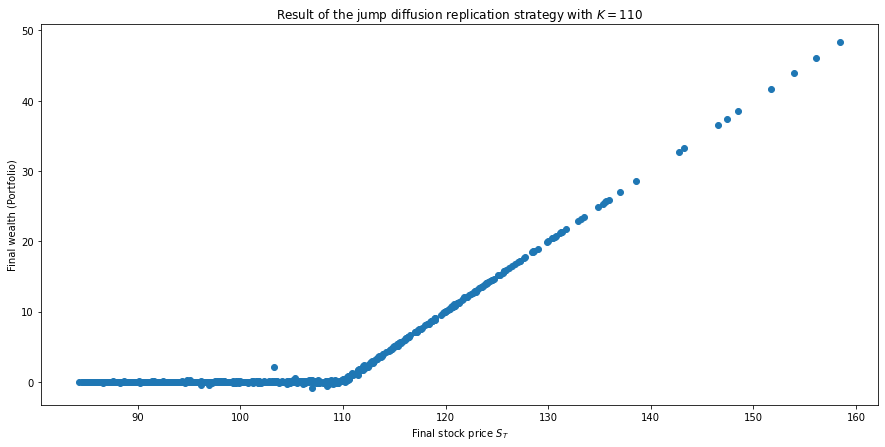

In [142]:
ax = plt.gca()
ax.scatter( ST, wealth );
ax.set_xlabel('Final stock price $S_T$')
ax.set_ylabel('Final wealth (Portfolio)')
ax.set_title('Result of the jump diffusion replication strategy with $K=110$');

## Summary

* Replication is often possible in more sophisticated models than the Black-Scholes model, but typically you must
  use additional hedging instruments such as derivatives.
* In practice this means that a trader can replicate path-dependent derivatives well using exchange-traded derivatives.
* One doesn't actually need to know the ${\mathbb P}$-measure model to know that the replication will work, what counts is
  the ${\mathbb Q}$-measure model.
* Traders find the ${\mathbb Q}$-measure model by calibrating to current market prices, *not* by analysing historical data.

# P and Q models

A classical derivatives trader is not usually very interested in the ${\mathbb P}$-measure model at all. They want to work out prices
and hedging strategies, non of which require knowing the ${\mathbb P}$-measure model.

In the Black-Scholes case we have seen that there is a unique ${\mathbb Q}$-measure model associated with ${\mathbb P}$-models of the form
$$
d S_t = S_t(\mu \, dt + \sigma \, dW_t)
$$
which can be obtained by setting $\mu=r$. This means there are lots of possible ${\mathbb P}$-measure models compatible with a single
${\mathbb Q}$-model.

`The uniqueness of the ${\mathbb Q}$-measure model comes from the fact that all derivatives can be replicated in the Black-Scholes model.`
In general given a ${\mathbb P}$-measure model for a single asset, there might be a number of possible pricing models that are compatible.

### Equivalent Probability Models

In general two probability measures are said to be *equivalent* if they agree on what is possible and what is not possible, even though they may disagree about the actual probability of events. In this context, an event is "possible" if its probability is greater than 0. 

**Example:** The jump-diffusion model and geometric Brownian motion are *not* equivalent because the stock price path is always continuous in the Black-Scholes model, but it may contain jumps in the jump-diffusion model.

**Example:** Two jump-diffusion models with different jump sizes cannot be equivalent.

**Theorem:** The models
$$
d S_t = \mu_1(S,t) \, dt + \sigma(S,t) \, d W^1_t
$$
and
$$
d S_t = \mu_2(S,t) \, dt + \sigma(S,t) \, d W^2_t
$$
for Brownian motions $W^1$ and $W^2$ are equivalent. This result follows from an important result called *Girsanov's Theorem*.


### Arbitrage

A trading strategy is called an *arbitrage* if it costs nothing, gives you a non-zero chance of making a profit and will never make a loss. Spotting an arbitrage opportunity is a gambler's dream!

If you use two different probability models for assets, they will have the same arbitrage opportunities. This is because the definition of arbitrage only depends upon what is possible and what is not possible: it is not important how big a chance you have of making a profit.

In general, mathematical models for prices should not contain any arbitrage opportunities. It is a sign that your model is no good. For example,
once there are arbitrage opportunities you can replicate anything by investing in the arbitrage opportunity and using the proceeds to perform the replication. This means that the entire concept of price falls apart.

${\mathbb Q}$-measure models have the attractive property that they can never contain an arbitrage. This is because if a derivative has a non-zero chance of having a positive payoff and never has a negative payoff it must have a postive price. Hence the price obtained using ${\mathbb Q}$-expectations will always be positive.

### The Black-Scholes model

**Theorem:** There are no arbitrage opportunities in the Black-Scholes model.

*Proof:*
The Black-Scholes model for stock prices is equivalent to the ${\mathbb Q}$-model
$$ d S_t = r S_t\, dt + \sigma S_t \, d W_t$$
by Girsanov's Theorem. Being a ${\mathbb Q}$-model, this model can't contain any arbitrage opportunities,
so neither can the Black-Scholes model.

### The Fundamental Theorem of Financial Mathematics

Using ${\mathbb Q}$-models has the huge advantage that you will never have arbitrage opportunities in your model. The converse is, to
all intents and purposes, true as well.

**Theorem:** Under a slightly stronger condition than no-arbitrage, any probability model for a linear market must admit at least one equivalent
${\mathbb Q}$-model.

[Note : By a "linear market", I mean one where you can buy and sell unlimited quantities all at the same price.]
### From Q to P

Although the original line of reasoning of Black and Scholes went from a ${\mathbb P}$-model to a ${\mathbb Q}$-model, we can now reverse that reasoning process.

* Suppose that you write down a ${\mathbb Q}$-measure model that fits market prices, it will be arbitrage free.
* Suppose also that you can show how to replicate derivatives in your ${\mathbb Q}$-measure model. This implies that there are no other competing
${\mathbb Q}$-measure models compatible with your pricing model.
* It follows that your ${\mathbb Q}$-measure model uniquely determines the prices for all the ${\mathbb P}$-measure models that are equivalent to it.
* You don't actually need to know the ${\mathbb P}$-measure model for the replication strategy to work.